# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import h5py
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import string as st

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function

In [17]:
def preprocess_text(text):
    doc = nlp(text.lower().strip())  # Lowercase and remove whitespace
    
    # Remove stopwords, punctuation, and lemmatize
    tokens = [token.lemma_ for token in doc 
             if not token.is_stop and not token.is_punct and token.is_alpha]
    
    return ' '.join(tokens)

In [14]:
def extract_linguistic_features(text):
    doc = nlp(text)
    features = {
        'num_verbs': len([token for token in doc if token.pos_ == 'VERB']),
        'num_nouns': len([token for token in doc if token.pos_ == 'NOUN']),
        'sentence_length': len(doc),
        'blooms_verb_present': any(token.text in {'analyze', 'evaluate', 'create'} for token in doc)
    }
    return features

# Pre Processing

In [25]:
label_mapper = {
    'BT1' : 'knowledge',
    'BT2' : 'comprehension',
    'BT3' : 'application',
    'BT4' : 'analysis',
    'BT5' : 'synthesis',
    'BT6' : 'evaluation'
}

# Load dataset
df = pd.DataFrame()
for i in range(1,5):
    q_df = pd.read_csv(os.getcwd().replace('notebook' , 'dataset') + '/dataset' + str(i) + '.csv')
    df = pd.concat([df , q_df])
# Apply preprocessing
mask = df['label'].isin(label_mapper.keys())
df['label'] = df['label'].mask(mask, df['label'].map(label_mapper))
df['label'] = df['label'].str.lower()
df['processed_question'] = df['question'].apply(preprocess_text)

In [26]:
df['label'].unique()

array(['comprehension', 'evaluation', 'application', 'knowledge',
       'analysis', 'synthesis'], dtype=object)

In [41]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features= 500)
tfidf = vectorizer.fit_transform(df['processed_question'])

In [42]:
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10704,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10705,0.0,0.0,0.0,0.0,0.0,0.333169,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10706,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
ling_features = df['processed_question'].apply(extract_linguistic_features).apply(pd.Series)
X_features = pd.concat([ling_features, pd.DataFrame(tfidf.toarray())], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [34]:
df.head(1)

,question,label,processed_question
0,"Suppose prices of two goods are constant, expl...",comprehension,suppose price good constant explain happen bud...


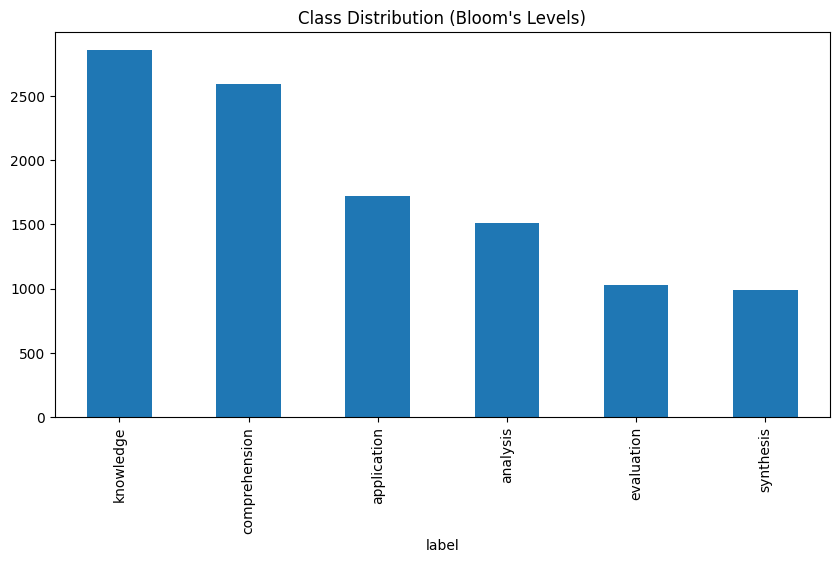

In [44]:
plt.figure(figsize=(10,5))
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution (Bloom\'s Levels)')
plt.show()

In [35]:
tfidf = TfidfVectorizer()
tfidf_vect = tfidf.fit_transform(df['processed_question'])

In [38]:
tfidf_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1200, 2674))